# Classify vectors from 01 using DBSCAN

In [1]:
import hdbscan
import pandas as pd
import numpy as np

In [26]:
# Load processed data
filtered_data = pd.read_csv("/Users/jamiesanders/Dropbox/ClassifyingESTC/intermediate_output/estc_btm_prepped.csv", encoding = "ISO-8859-1")
filtered_data = filtered_data.sort_values("system_number")

filtered_data.head()
filtered_data.shape

(94690, 6)

# Clustering

In [2]:
# Full
clusterer_full = hdbscan.HDBSCAN(min_cluster_size=100)
features_full = np.load("/Users/jamiesanders/Dropbox/ClassifyingESTC/intermediate_output/features_full.npy")
clusterer_full.fit(features_full)

HDBSCAN(min_cluster_size=100)

In [19]:
# full stats (n topics, n unclustered)
print(clusterer_full.labels_.max())
print(sum(clusterer_full.labels_<0))

8
2818


<Axes: ylabel='$\\lambda$ value'>

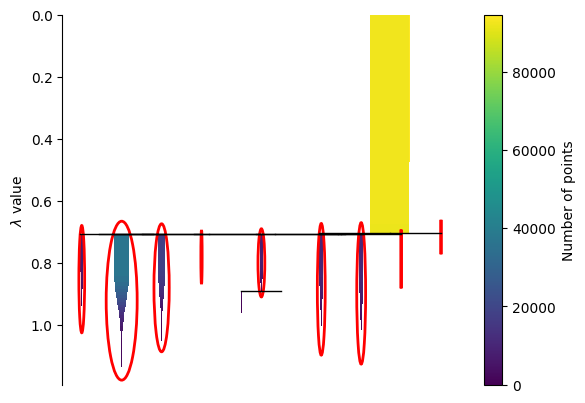

In [15]:
clusterer_full.condensed_tree_.plot(select_clusters=True)

In [5]:
# 100
clusterer_100 = hdbscan.HDBSCAN(min_cluster_size=100)
features_100 = np.load("/Users/jamiesanders/Dropbox/ClassifyingESTC/intermediate_output/features_100.npy")
clusterer_100.fit(features_100)

HDBSCAN(min_cluster_size=100)

In [20]:
# 100 stats (n topics, n unclustered)
print(clusterer_100.labels_.max())
print(sum(clusterer_100.labels_<0))

9
2471


<Axes: ylabel='$\\lambda$ value'>

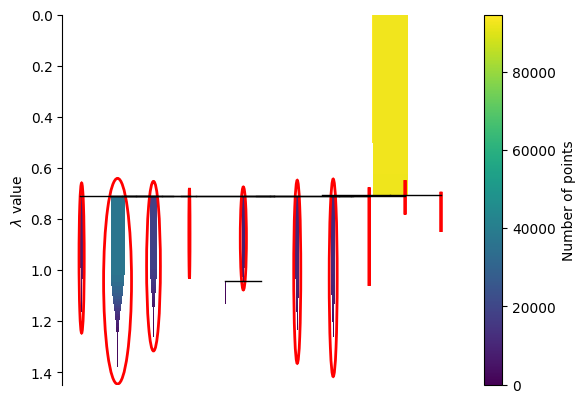

In [7]:
clusterer_100.condensed_tree_.plot(select_clusters=True)

In [8]:
# 50
clusterer_50 = hdbscan.HDBSCAN(min_cluster_size=100)
features_50 = np.load("/Users/jamiesanders/Dropbox/ClassifyingESTC/intermediate_output/features_50.npy")
clusterer_50.fit(features_50)

HDBSCAN(min_cluster_size=100)

In [22]:
# 50 stats (n topics, n unclustered)
print(clusterer_50.labels_.max())
print(sum(clusterer_50.labels_<0))

10
2339


<Axes: ylabel='$\\lambda$ value'>

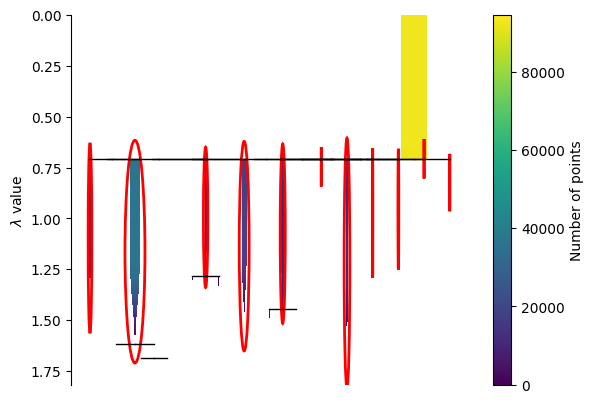

In [10]:
clusterer_50.condensed_tree_.plot(select_clusters=True)

In [11]:
# 25
clusterer_25 = hdbscan.HDBSCAN(min_cluster_size=100)
features_25 = np.load("/Users/jamiesanders/Dropbox/ClassifyingESTC/intermediate_output/features_25.npy")
clusterer_25.fit(features_25)

HDBSCAN(min_cluster_size=100)

In [37]:
# 25 stats (n topics, n unclustered)
print(clusterer_25.labels_.max())
print(sum(clusterer_25.labels_<0))

10
2313


<Axes: ylabel='$\\lambda$ value'>

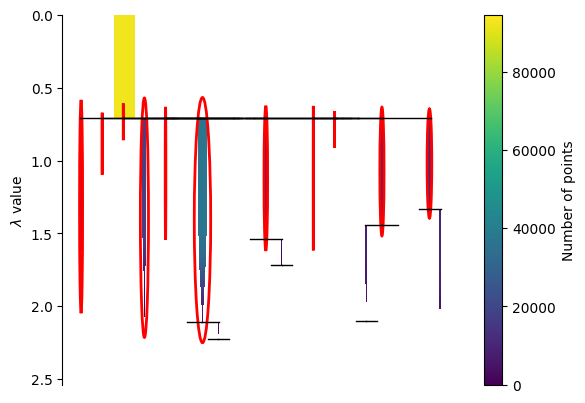

In [13]:
clusterer_25.condensed_tree_.plot(select_clusters=True)

In [45]:
cluster_data = filtered_data.copy()
cluster_data['cluster_full'] = clusterer_full.labels_
cluster_data['cluster_100'] = clusterer_100.labels_
cluster_data['cluster_50'] = clusterer_50.labels_
cluster_data['cluster_25'] = clusterer_25.labels_

cluster_data[cluster_data['cluster_full'] < 0]

,system_number,date,pages,format,title,clean_title,cluster_full,cluster_100,cluster_50,cluster_25
93161,6058585,1699.0,NaN,quarter_sheet,For the encouragement of ladies and gentlemen ...,encourag ladi gentlemen catalogu play propos s...,-1,-1,-1,-1
74699,6061111,1688.0,NaN,half_sheet,The use and virtues of trefoyl : otherwise cal...,use virtu trefoyl otherwis call nonesuch,-1,-1,-1,-1
47192,6071134,1663.0,NaN,quarto,"Mercurius fumigosus, or, The smoaking nocturna...",mercuriu fumigosu smoak nocturn commun mani st...,-1,-1,-1,-1
64518,6071162,1681.0,NaN,half_sheet,The History of reformation : in a dialogue bet...,histori reform dialogu philanax erasmu,-1,-1,-1,-1
73590,6071168,1687.0,NaN,quarto,The Universal historical bibliotheque: or An a...,univers histor bibliothequ account consider bo...,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...
70915,6482008,1684.0,48.0,24mo,"Goldsmith, 1684. An almanack for the year of o...",goldsmith almanack year lord god leap year whe...,-1,-1,-1,-1
46117,6482013,1661.0,48.0,24mo,"Goldsmith, 1661. An almanack for the year of o...",goldsmith almanack year lord god first bissext...,-1,-1,-1,-1
60153,6482019,1677.0,400.0,10mo,"Colloquia, et dictionariolum octo linguarum, L...",colloquia et dictionariolum octo linguarum lat...,-1,-1,-1,-1
26420,6482578,1646.0,400.0,10mo,"Colloquia, et dictionariolum octo linguarum, L...",colloquia et dictionariolum octo linguarum lat...,-1,-1,-1,-1


In [42]:
# Save to dropbox
cluster_data.to_csv("/Users/jamiesanders/Dropbox/ClassifyingESTC/results/model_2_results.csv")